## The Heat Equation in 1D

This is **Example 6.1.1** in Theorical Numerical Analysis by Atkinson

**PDE Form**

$$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, \quad \text{\quad in\quad} (0, \pi) \times (0, T) $$

Where:
- $u(x,t)$: Temperature at position $x$ and time $t$
- $\alpha$: Thermal diffusivity (a constant)
- $T$: Final time

**Boundary Condition**
$$u(0,t) = u(\pi,t) = 0, \quad 0 \leqslant t \leqslant T$$

**Initial Condition**
$$u(x, 0) = u_{0}(x) \quad 0\leqslant x \leqslant \pi$$

**Discretization**
- Using Finite Difference, particularly Crank-Nicholson method with

$x_{i} = ih_{x}, \text{\quad where \quad} i =  1, ..., N_x - 1\\$
$t_{m} = mh_{t}, \text{\quad where \quad} m =  1, ..., N_t - 1$

the grid points are $(x_{i}, t_{m})$ furthermore, $h_{x} = \frac{\pi}{N_{x}}$ and $h_{t} = \frac{T}{N_{t}}$

Hence, the PDE is discretizing as:

$$ \approx \frac{u_{i}^{m} - u_{i}^{m-1}}{h_t} = \alpha \frac{(u_{i+1}^{m} - 2u_{i}^{m} + u_{i-1}^m) + (u_{i+1}^{m-1} - 2u_{i}^{m-1} + u_{i-1}^{m-1})}{h_{x}^2}$$

Let $r = \frac{h_{t}\alpha}{h_{x}^2}$, we have:

$$ (1 + r)u_{i}^{m} - \frac{r}{2}(u_{i+1}^{m} + u_{i-1}^{m}) = (1 - r)u_{i}^{m-1} + \frac{r}{2}(u_{i+1}^{m-1} + u_{i-1}^{m-1})$$

Hence, we obtain a system of $\bold{A} \cdot u^{m} = \bold{B} \cdot u^{m-1}$, such as:

$$
\begin{bmatrix} 
1 + r & -\frac{r}{2} & 0 & \cdots & 0 \\ 
-\frac{r}{2} & 1 + r & -\frac{r}{2} & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & -\frac{r}{2} \\
0 & 0 & 0 & -\frac{r}{2} & 1 + r
\end{bmatrix}
\cdot 
\begin{bmatrix}
u_{1}^{m} \\ u_{2}^{m} \\ \vdots \\ u_{N_{x}}^{m}
\end{bmatrix}

=

\begin{bmatrix} 
1 - r & \frac{r}{2} & 0 & \cdots & 0 \\ 
\frac{r}{2} & 1 - r & \frac{r}{2} & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \frac{r}{2} \\
0 & 0 & 0 & \frac{r}{2} & 1 - r
\end{bmatrix}
\cdot 
\begin{bmatrix}
u_{1}^{m-1} \\ u_{2}^{m-1} \\ \vdots \\ u_{N_{x}}^{m-1}
\end{bmatrix}


$$



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def thomas_algorithm(a, d, c, b):
    """
    Solve the tridiagonal system Ax = b using the Thomas algorithm.
    Parameters:
        a : numpy.ndarray
            Subdiagonal of A (length N-1).
        d : numpy.ndarray
            Main diagonal of A (length N).
        c : numpy.ndarray
            Superdiagonal of A (length N-1).
        b : numpy.ndarray
            Right-hand side vector (length N).
    Returns:
        x : numpy.ndarray
            Solution vector (length N).
    """
    n = len(d)
    # Forward elimination
    for i in range(1, n):
        factor = a[i-1] / d[i-1]
        d[i] -= factor * c[i-1]
        b[i] -= factor * b[i-1]

    # Back substitution
    x = np.zeros(n)
    x[-1] = b[-1] / d[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - c[i] * x[i+1]) / d[i]

    return x

# Define parameters
r = 1.0  # Example r
Nx = 5  # Number of grid points

# Define A's diagonals
d_A = (1 + r) * np.ones(Nx)  # Main diagonal
c_A = -0.5 * r * np.ones(Nx - 1)  # Upper diagonal
a_A = -0.5 * r * np.ones(Nx - 1)  # Lower diagonal

# Define B's diagonals
d_B = (1 - r) * np.ones(Nx)  # Main diagonal
c_B = 0.5 * r * np.ones(Nx - 1)  # Upper diagonal
a_B = 0.5 * r * np.ones(Nx - 1)  # Lower diagonal

# Initial condition for u^(m-1)
u_prev = np.random.rand(Nx)  # Example u^(m-1)

# Compute b = B * u^(m-1) using tridiagonal structure
b = np.zeros(Nx)
b[0] = d_B[0] * u_prev[0] + c_B[0] * u_prev[1]
for i in range(1, Nx-1):
    b[i] = a_B[i-1] * u_prev[i-1] + d_B[i] * u_prev[i] + c_B[i] * u_prev[i+1]
b[-1] = a_B[-1] * u_prev[-2] + d_B[-1] * u_prev[-1]

# Solve A * u^m = b using Thomas algorithm
u_m = thomas_algorithm(a_A, d_A, c_A, b)

print("Solution u^m:", u_m)


Solution u^m: [0.15987153 0.32937903 0.47635921 0.48106384 0.31648768]


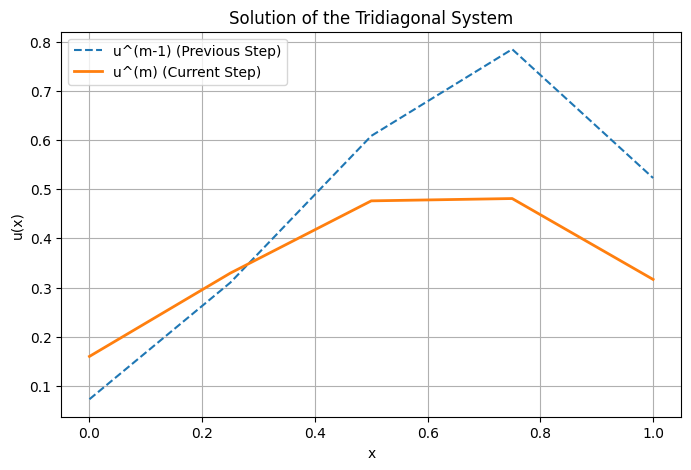

In [3]:
# Plot the solution
x = np.linspace(0, 1, Nx)
plt.figure(figsize=(8, 5))
plt.plot(x, u_prev, label="u^(m-1) (Previous Step)", linestyle="--")
plt.plot(x, u_m, label="u^(m) (Current Step)", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solution of the Tridiagonal System")
plt.legend()
plt.grid(True)
plt.show()